# Naive Bayes Classifier - Yeast Dataset

In [1]:
# Import libraries
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import joblib

# Import project modules
from src.data_loader import load_processed_data
from src.config import *

print("🧠 Naive Bayes Classifier Analysis")
print("=" * 40)

🧠 Naive Bayes Classifier Analysis


In [2]:
# Load the processed data
print("1. Loading processed data...")
X_train, X_test, y_train, y_test = load_processed_data()

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Load class names
label_encoder = np.load(MODELS_DIR / 'label_encoder.npy', allow_pickle=True)
class_names = label_encoder
print(f"Class names: {class_names}")

1. Loading processed data...
Training data shape: (1038, 8)
Test data shape: (446, 8)
Number of classes: 10
Class names: ['CYT' 'ERL' 'EXC' 'ME1' 'ME2' 'ME3' 'MIT' 'NUC' 'POX' 'VAC']


In [3]:
# Load the trained Naive Bayes model
print("2. Loading trained Naive Bayes model...")
model = joblib.load(MODELS_DIR / 'naive_bayes.pkl')

print(f"Model type: {type(model)}")
print(f"Number of classes: {len(model.classes_)}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

print(f"Predictions shape: {y_pred.shape}")
print(f"Prediction probabilities shape: {y_pred_proba.shape}")

2. Loading trained Naive Bayes model...
Model type: <class 'sklearn.naive_bayes.GaussianNB'>
Number of classes: 10
Predictions shape: (446,)
Prediction probabilities shape: (446, 10)


/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [4]:
# Model Performance Analysis
print("3. Model Performance Analysis")
print("=" * 30)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

3. Model Performance Analysis
Accuracy: 0.1211
Precision: 0.3649
Recall: 0.1211
F1-Score: 0.1343

Detailed Classification Report:
              precision    recall  f1-score   support

         CYT       0.00      0.00      0.00       139
         ERL       1.00      1.00      1.00         2
         EXC       0.25      0.64      0.36        11
         ME1       0.32      0.77      0.45        13
         ME2       0.00      0.00      0.00        15
         ME3       0.00      0.00      0.00        49
         MIT       0.70      0.10      0.17        73
         NUC       0.76      0.15      0.25       129
         POX       0.75      0.50      0.60         6
         VAC       0.02      0.67      0.03         9

    accuracy                           0.12       446
   macro avg       0.38      0.38      0.29       446
weighted avg       0.36      0.12      0.13       446



/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/homebrew/lib/python3.13

4. Confusion Matrix


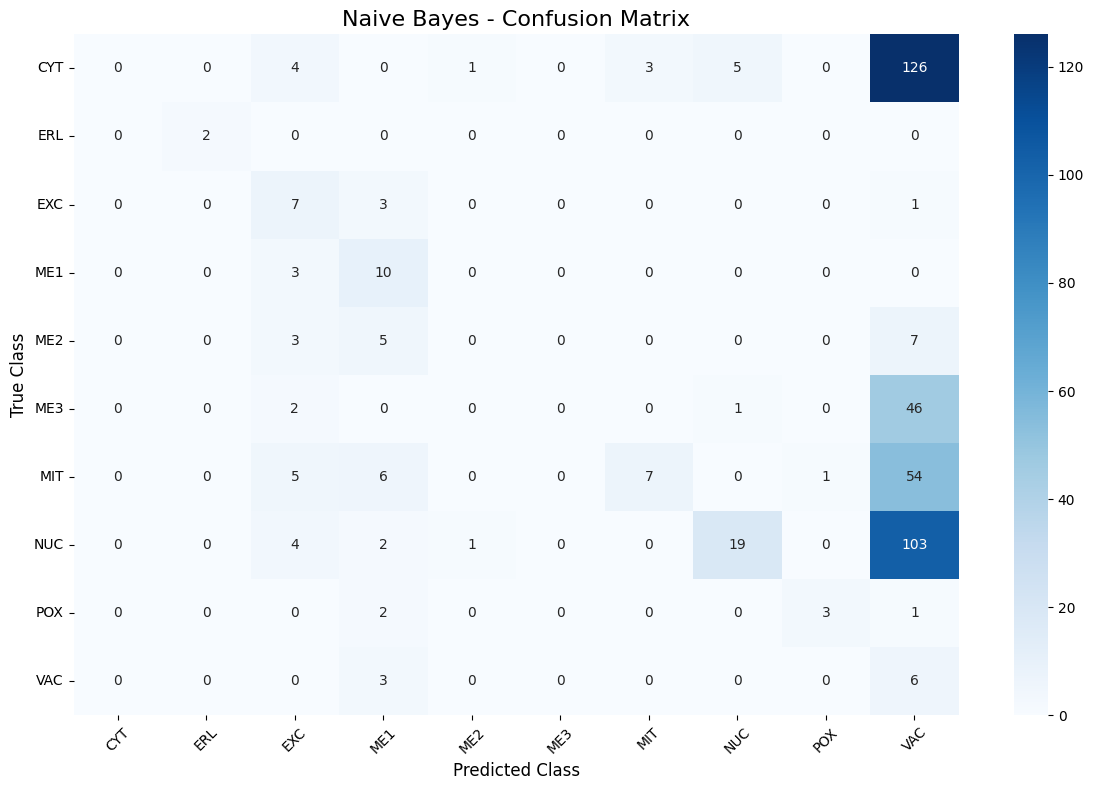


Per-class Accuracy:
CYT: 0.000
ERL: 1.000
EXC: 0.636
ME1: 0.769
ME2: 0.000
ME3: 0.000
MIT: 0.096
NUC: 0.147
POX: 0.500
VAC: 0.667


In [5]:
# Confusion Matrix Visualization
print("4. Confusion Matrix")
print("=" * 20)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Naive Bayes - Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nPer-class Accuracy:")
for i, (class_name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{class_name}: {acc:.3f}")

5. Probability Analysis
Sample predictions and probabilities:
Sample 1: VAC (confidence: 0.914)
Sample 2: VAC (confidence: 0.547)
Sample 3: VAC (confidence: 0.693)
Sample 4: VAC (confidence: 0.998)
Sample 5: EXC (confidence: 0.928)


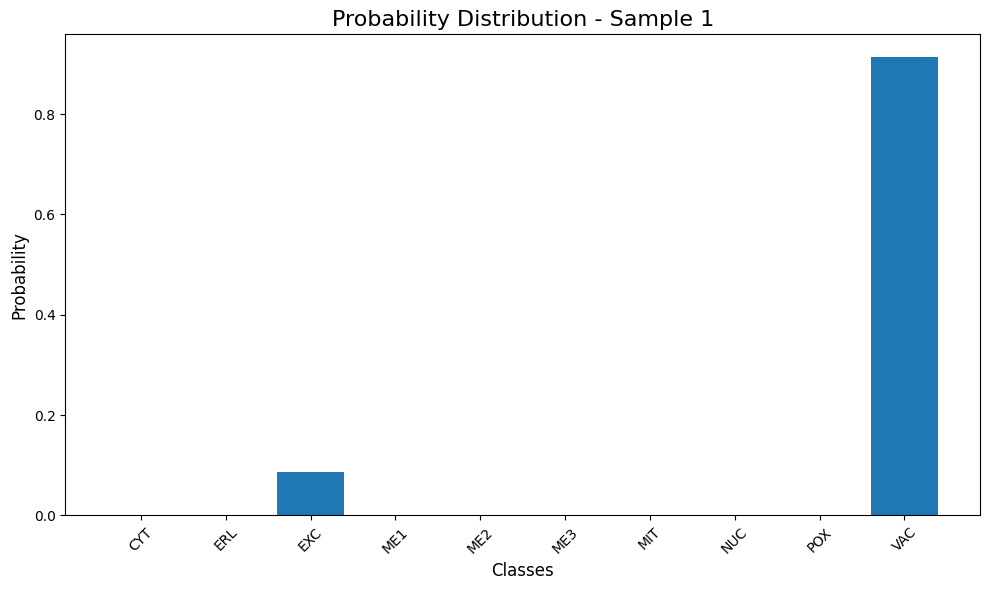

In [6]:
# Probability Analysis
print("5. Probability Analysis")
print("=" * 25)

# Get class probabilities for first few samples
sample_probs = y_pred_proba[:5]
sample_preds = y_pred[:5]

print("Sample predictions and probabilities:")
for i, (pred, probs) in enumerate(zip(sample_preds, sample_probs)):
    pred_class = class_names[pred]
    max_prob = np.max(probs)
    print(f"Sample {i+1}: {pred_class} (confidence: {max_prob:.3f})")

# Plot probability distribution for first sample
plt.figure(figsize=(10, 6))
plt.bar(class_names, sample_probs[0])
plt.title('Probability Distribution - Sample 1', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Learning Curves Analysis


/opt/homebrew/lib/python3.13/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


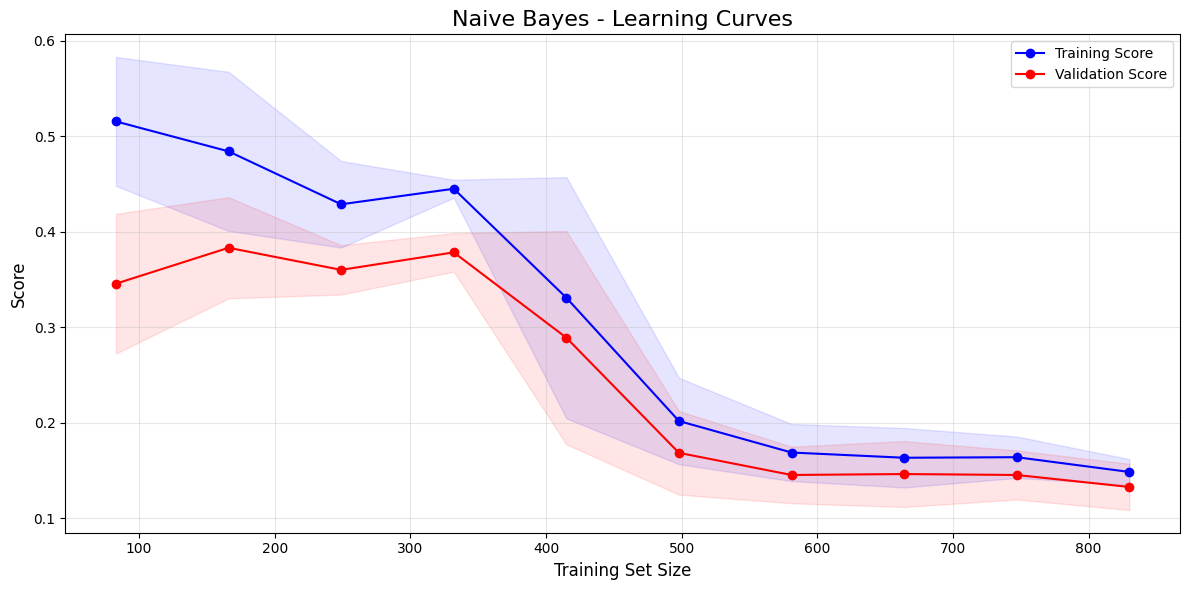

Final training score: 0.1487 ± 0.0135
Final validation score: 0.1330 ± 0.0242


In [7]:
# Learning Curves
print("6. Learning Curves Analysis")
print("=" * 30)

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Score', color='red')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

plt.title('Naive Bayes - Learning Curves', fontsize=16)
plt.xlabel('Training Set Size', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training score: {train_mean[-1]:.4f} ± {train_std[-1]:.4f}")
print(f"Final validation score: {val_mean[-1]:.4f} ± {val_std[-1]:.4f}")